In [2]:
train_data_dir = '/n/holylfs/LABS/wadduwage_lab/Lab/navodini/_results/_cnn_synthTrData/17-Aug-2021/dmd_exp_tfm_mouse_20201224_100um/mouse_Synbv_100um_data_6sls_20mc_tr.h5'
test_data_dir = '/n/holylfs/LABS/wadduwage_lab/Lab/navodini/_results/_cnn_synthTrData/17-Aug-2021/dmd_exp_tfm_mouse_20201224_100um/mouse_Synbv_100um_data_6sls_20mc_test.h5'


In [3]:
import torch

In [49]:
import h5py

f = h5py.File(test_data_dir, 'r')

In [50]:
for key in f.keys():
    print(key) #Names of the groups in HDF5 file.

input
gt


In [51]:
import numpy as np

gt = np.array(f['gt'])
inputs = np.array(f['input'])

In [52]:
gt.shape, inputs.shape

((128, 1, 326, 326), (128, 32, 326, 326))

In [53]:
import matplotlib.pyplot as plt
import torchvision
import cv2


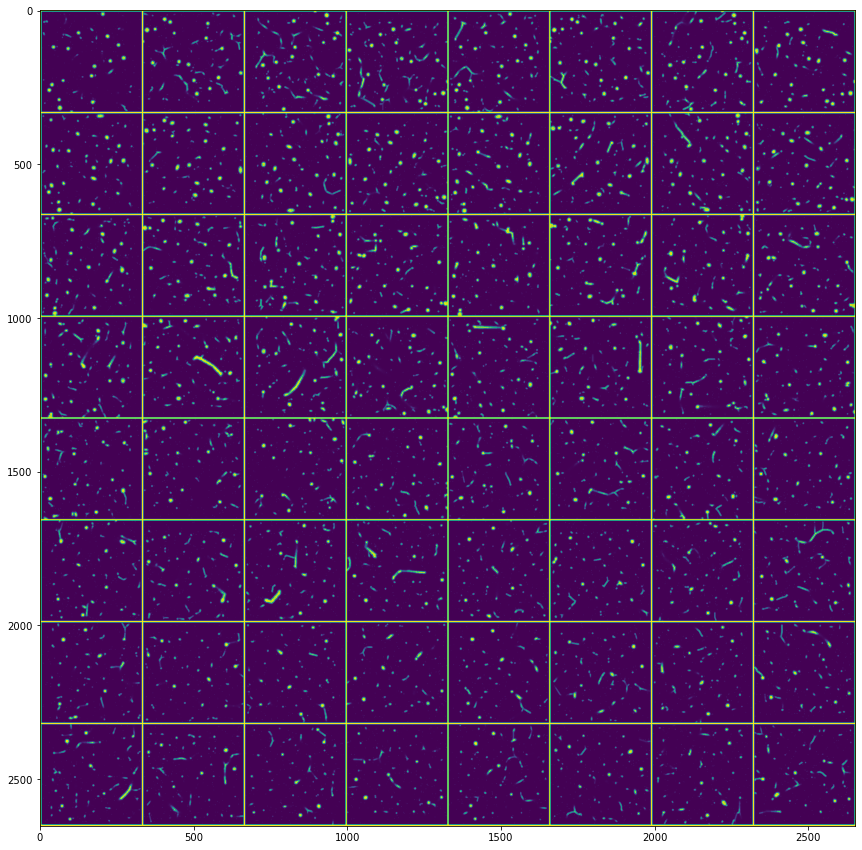

In [55]:
grid_img = torchvision.utils.make_grid(torch.from_numpy(gt[:64]), nrow=8, padding= 5,pad_value= 1)
plt.figure(figsize= (15, 15))
plt.imshow(cv2.cvtColor(grid_img.permute(1,2,0).numpy(), cv2.COLOR_RGB2GRAY))
plt.show()

## Datasets and DataLoaders

In [1]:
import sys
sys.path.append('..')

from modules.datasets import *
from modules.data_utils import *


total images found in: [train] -- /n/holylfs/LABS/wadduwage_lab/Lab/navodini/_results/_cnn_synthTrData/17-Aug-2021/dmd_exp_tfm_mouse_20201224_100um/mouse_Synbv_100um_data_6sls_20mc_tr.h5 -> 2152
total images found in: [val] -- /n/holylfs/LABS/wadduwage_lab/Lab/navodini/_results/_cnn_synthTrData/17-Aug-2021/dmd_exp_tfm_mouse_20201224_100um/mouse_Synbv_100um_data_6sls_20mc_test.h5 -> 128
total images found in: [test] -- /n/holylfs/LABS/wadduwage_lab/Lab/navodini/_results/_cnn_synthTrData/17-Aug-2021/dmd_exp_tfm_mouse_20201224_100um/mouse_Synbv_100um_data_6sls_20mc_test.h5 -> 128


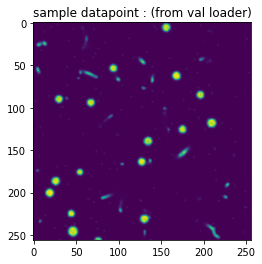

dataset value range :  9.999999747378752e-05 0.9960788488388062


In [12]:
img_size= 256
delta= 0.0001
num_samples_train= 2000
batch_size_train= 32

trainset, valset, testset = neuronal(img_size= img_size, delta= delta, num_samples_train= num_samples_train)

drop_last_val_test= True

train_loader, val_loader, test_loader = return_dataloaders(trainset, valset, testset, batch_size_train= batch_size_train, drop_last_val_test= drop_last_val_test)


torch.Size([25, 1, 256, 256]) torch.Size([25])
torch.Size([25, 1, 256, 256]) torch.Size([25])
torch.Size([25, 1, 256, 256]) torch.Size([25])
torch.Size([25, 1, 256, 256]) torch.Size([25])
torch.Size([25, 1, 256, 256]) torch.Size([25])


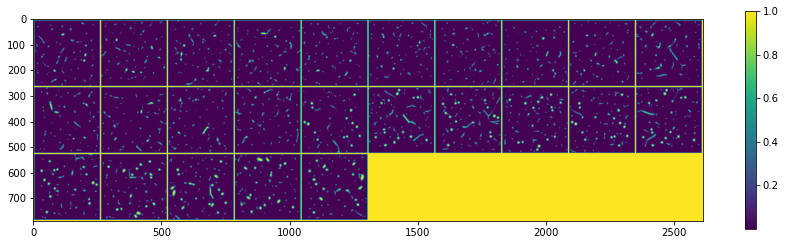

In [9]:
import cv2
for x,y in val_loader:
    print(x.shape, y.shape)
grid_img = torchvision.utils.make_grid(x, nrow=10, padding= 5,pad_value= 1)
plt.figure(figsize= (15, 4))
plt.imshow(cv2.cvtColor(grid_img.permute(1,2,0).numpy(), cv2.COLOR_RGB2GRAY))
plt.colorbar()


In [10]:
x.min(), x.max()

(tensor(1.0000e-04), tensor(0.9961))